<a href="https://colab.research.google.com/github/ristaangdembay/Bootcamp-DA-AI/blob/main/W_9_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Generate synthetic time series data
np.random.seed(42)
time_steps = 100 # number of time steps
x = np.linspace(0, 50, time_steps)
y = np.sin(x) + np.random.normal(scale = 0.9, size = time_steps)


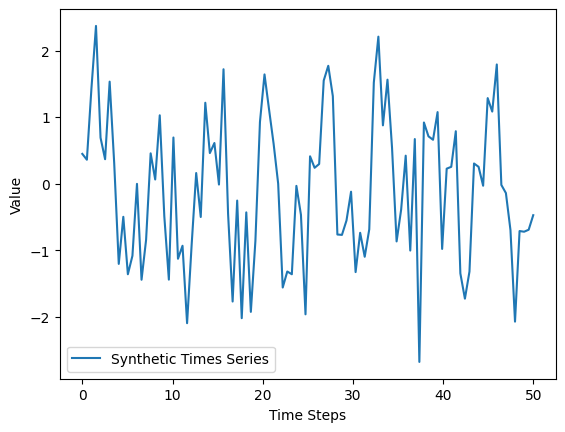

In [ ]:
# Plot the synthetic time series data
plt.plot(x,y, label = 'Synthetic Times Series')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Scale the data(normalizing to the range [0,1])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
y_scaled = scaler.fit_transform(y.reshape(-1,1))
y_scaled

array([[0.61912351],
       [0.6017596 ],
       [0.81386055],
       [1.        ],
       [0.66725969],
       [0.60332808],
       [0.83418038],
       [0.59137903],
       [0.29174412],
       [0.43190143],
       [0.26096254],
       [0.31569209],
       [0.52995031],
       [0.24456239],
       [0.36333574],
       [0.62079655],
       [0.54299211],
       [0.73399288],
       [0.4335409 ],
       [0.24491951],
       [0.66790521],
       [0.3069666 ],
       [0.34575198],
       [0.11525032],
       [0.34813225],
       [0.56218311],
       [0.43136003],
       [0.77136078],
       [0.62157534],
       [0.65152544],
       [0.52789299],
       [0.8710514 ],
       [0.44129295],
       [0.17973383],
       [0.48021278],
       [0.13015463],
       [0.44509062],
       [0.14896338],
       [0.36019818],
       [0.71417803],
       [0.85568558],
       [0.75116569],
       [0.649136  ],
       [0.53045534],
       [0.22148352],
       [0.26912182],
       [0.26090655],
       [0.523

In [ ]:
def create_sequences(data, time_steps = 10):
  x, y = [], []
  for i in range(len(data)-time_steps):
    x.append(data[i:i + time_steps, 0])
    y.append(data[i + time_steps, 0])
  return np.array(x), np.array(y)

In [ ]:
# Define time step window(how many past time steps the model will consider)
time_step_window = 10

x, y = create_sequences(y_scaled, time_step_window)

In [ ]:
x

array([[0.61912351, 0.6017596 , 0.81386055, 1.        , 0.66725969,
        0.60332808, 0.83418038, 0.59137903, 0.29174412, 0.43190143],
       [0.6017596 , 0.81386055, 1.        , 0.66725969, 0.60332808,
        0.83418038, 0.59137903, 0.29174412, 0.43190143, 0.26096254],
       [0.81386055, 1.        , 0.66725969, 0.60332808, 0.83418038,
        0.59137903, 0.29174412, 0.43190143, 0.26096254, 0.31569209],
       [1.        , 0.66725969, 0.60332808, 0.83418038, 0.59137903,
        0.29174412, 0.43190143, 0.26096254, 0.31569209, 0.52995031],
       [0.66725969, 0.60332808, 0.83418038, 0.59137903, 0.29174412,
        0.43190143, 0.26096254, 0.31569209, 0.52995031, 0.24456239],
       [0.60332808, 0.83418038, 0.59137903, 0.29174412, 0.43190143,
        0.26096254, 0.31569209, 0.52995031, 0.24456239, 0.36333574],
       [0.83418038, 0.59137903, 0.29174412, 0.43190143, 0.26096254,
        0.31569209, 0.52995031, 0.24456239, 0.36333574, 0.62079655],
       [0.59137903, 0.29174412, 0.4319014

In [ ]:
y

array([0.26096254, 0.31569209, 0.52995031, 0.24456239, 0.36333574,
       0.62079655, 0.54299211, 0.73399288, 0.4335409 , 0.24491951,
       0.66790521, 0.3069666 , 0.34575198, 0.11525032, 0.34813225,
       0.56218311, 0.43136003, 0.77136078, 0.62157534, 0.65152544,
       0.52789299, 0.8710514 , 0.44129295, 0.17973383, 0.48021278,
       0.13015463, 0.44509062, 0.14896338, 0.36019818, 0.71417803,
       0.85568558, 0.75116569, 0.649136  , 0.53045534, 0.22148352,
       0.26912182, 0.26090655, 0.52395384, 0.43780241, 0.14165777,
       0.6120159 , 0.57777822, 0.58902225, 0.83737081, 0.88131812,
       0.7910229 , 0.37919373, 0.37805058, 0.42091579, 0.50658453,
       0.26734655, 0.38426577, 0.31290657, 0.3947881 , 0.83155861,
       0.96807989, 0.70406716, 0.84003825, 0.63713221, 0.35864626,
       0.45339622, 0.61384219, 0.33146015, 0.6632954 , 0.        ,
       0.7125288 , 0.67138843, 0.66115897, 0.74353565, 0.33630283,
       0.5751676 , 0.58068693, 0.68660233, 0.26349297, 0.18821

In [ ]:
# Reshape X for LSTM
x = x.reshape(x.shape[0], x.shape[1], 1)

print(f"Shape of X: {x.shape}")  # X shape should be(samples, time steps, features)
print(f"Shape of y:{y.shape}") # Y shape should be (samples,)

Shape of X: (90, 10, 1)
Shape of y:(90,)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the LSTM Model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(units = 50, return_sequences = False))

In [ ]:
# Add a dense layer for output
model.add(Dense(units = 1))

model.compile(optimizer ='adam', loss  = 'mean_squared_error')

In [ ]:
# Train the model
history = model.fit(x,y, epochs = 20, batch_size = 16, validation_split = 0.2)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.2854 - val_loss: 0.2168
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2460 - val_loss: 0.1521
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1571 - val_loss: 0.0731
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0796 - val_loss: 0.0732
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0730 - val_loss: 0.0745
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0691 - val_loss: 0.0489
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0626 - val_loss: 0.0500
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0590 - val_loss: 0.0479
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0577 - val_loss: 0.0490
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0596 - val_loss: 0.0515
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0637 - val_loss: 0.0478
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0631 - val_loss: 0.0459


In [ ]:
# Predict the next values using the trainde model
predicted_values = model.predict(x)

predicted_values_unscaled = scaler.inverse_transform(predicted_values)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [ ]:
# Plot the actual VS predicted values
plt.plot(x[time_ste])